In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

In [5]:
from tensorflow.keras.datasets import cifar10


In [7]:
cifardata=cifar10

In [8]:
(X_train_full, y_train_full), (X_test, y_test) = cifardata.load_data()

170498071/170498071 [==============================] - 2s 0us/step


In [9]:
print(f"data type of X_train_full: {X_train_full.dtype},\n shape of X_train_full: {X_train_full.shape}")

data type of X_train_full: uint8,
 shape of X_train_full: (50000, 32, 32, 3)


In [10]:
X_test.shape

(10000, 32, 32, 3)

In [11]:
# create a validation data set from the full training data
# Scale the data between 0 to 1 by dividing it by 255. as its an unsigned data between 0-255 range
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

# scale the test set as well
X_test = X_test / 255.

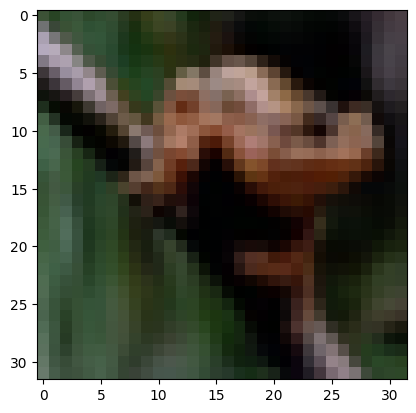

In [12]:
# Lets view some data
plt.imshow(X_train[0], cmap="binary")
plt.show()

In [21]:
# Creating layers of ANN
LAYERS = [tf.keras.layers.Flatten(input_shape=[32,32,3], name="inputLayer"),
          tf.keras.layers.Dense(300, activation="relu", name="hiddenLayer1"),
          tf.keras.layers.Dense(100, activation="relu", name="hiddenLayer2"),
          tf.keras.layers.Dense(10, activation="softmax", name="outputLayer")]

model_clf = tf.keras.models.Sequential(LAYERS)

In [22]:
model_clf.layers

In [23]:
LOSS_FUNCTION = "sparse_categorical_crossentropy" # use => tf.losses.sparse_categorical_crossentropy
OPTIMIZER = "SGD" # or use with custom learning rate=> tf.keras.optimizers.SGD(0.02)
METRICS = ["accuracy"]

model_clf.compile(loss=LOSS_FUNCTION,
              optimizer=OPTIMIZER,
              metrics=METRICS)


In [24]:
# training

EPOCHS = 30
VALIDATION_SET = (X_valid, y_valid)

history = model_clf.fit(X_train, y_train, epochs=EPOCHS,
                    validation_data=VALIDATION_SET, batch_size=32)


Epoch 1/30
1407/1407 [==============================] - 12s 8ms/step - loss: 1.8954 - accuracy: 0.3201 - val_loss: 1.8255 - val_accuracy: 0.3402
Epoch 2/30
1407/1407 [==============================] - 10s 7ms/step - loss: 1.7123 - accuracy: 0.3934 - val_loss: 1.6768 - val_accuracy: 0.3964
Epoch 3/30
1407/1407 [==============================] - 11s 8ms/step - loss: 1.6298 - accuracy: 0.4212 - val_loss: 1.6960 - val_accuracy: 0.3894
Epoch 4/30
1407/1407 [==============================] - 10s 7ms/step - loss: 1.5750 - accuracy: 0.4427 - val_loss: 1.6509 - val_accuracy: 0.4044
Epoch 5/30
1407/1407 [==============================] - 10s 7ms/step - loss: 1.5290 - accuracy: 0.4598 - val_loss: 1.5988 - val_accuracy: 0.4278
Epoch 6/30
1407/1407 [==============================] - 9s 7ms/step - loss: 1.4938 - accuracy: 0.4718 - val_loss: 1.5588 - val_accuracy: 0.4448
Epoch 7/30
1407/1407 [==============================] - 10s 7ms/step - loss: 1.4572 - accuracy: 0.4852 - val_loss: 1.5544 - val_acc

In [25]:
model_clf.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.5894 - accuracy: 0.4513


[1.5894092321395874, 0.4512999951839447]

In [26]:
x_new = X_test[:3]

In [27]:
actual = y_test[:3]
actual

array([[3],
       [8],
       [8]], dtype=uint8)

In [28]:


y_prob = model_clf.predict(x_new)
y_prob.round(3)

1/1 [==============================] - 0s 209ms/step


array([[0.02 , 0.012, 0.025, 0.72 , 0.056, 0.066, 0.001, 0.002, 0.067,
        0.031],
       [0.004, 0.181, 0.002, 0.001, 0.001, 0.   , 0.   , 0.001, 0.684,
        0.127],
       [0.02 , 0.06 , 0.001, 0.   , 0.002, 0.   , 0.   , 0.011, 0.844,
        0.062]], dtype=float32)

In [29]:
y_prob

array([[2.0305347e-02, 1.1625639e-02, 2.5106328e-02, 7.1953410e-01,
        5.5529892e-02, 6.6153683e-02, 1.2358074e-03, 1.8439483e-03,
        6.7394115e-02, 3.1271134e-02],
       [3.8727222e-03, 1.8129504e-01, 1.7783790e-03, 5.3567305e-04,
        6.2501227e-04, 2.5131920e-04, 6.9257410e-05, 8.3617534e-04,
        6.8413734e-01, 1.2659912e-01],
       [2.0128421e-02, 5.9664268e-02, 8.5781154e-04, 1.7368438e-04,
        1.5955147e-03, 2.9892317e-04, 7.7567638e-05, 1.0808165e-02,
        8.4434009e-01, 6.2055580e-02]], dtype=float32)

In [30]:
y_pred = np.argmax(y_prob, axis = -1)

In [31]:
y_pred

array([3, 8, 8])

In [32]:
actual

array([[3],
       [8],
       [8]], dtype=uint8)

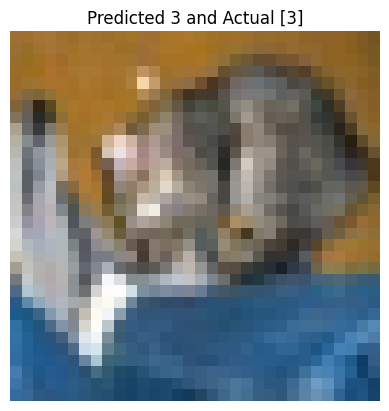

######################


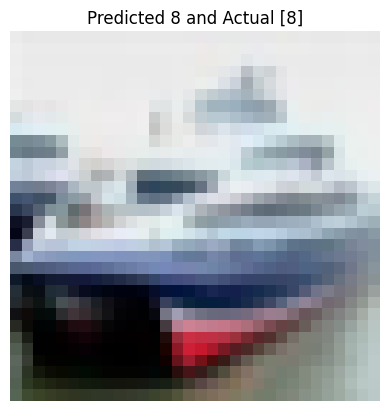

######################


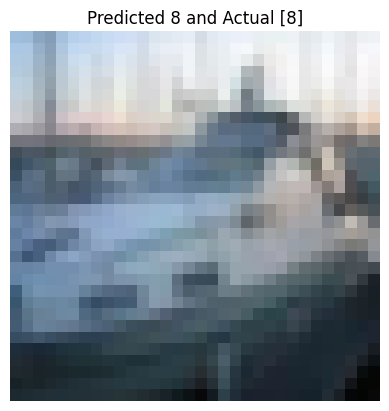

######################


In [33]:
# plot
for data, pred, actual_data in zip(x_new, y_pred, actual):
  plt.imshow(data, cmap="binary")
  plt.title(f"Predicted {pred} and Actual {actual_data}")
  plt.axis("off")
  plt.show()
  print("######################")